In [1]:
import pandas as pd


import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

0.3724
-0.4767


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
import pandas as pd


In [52]:
pdata = pd.read_csv("philosophy_data.csv")

In [11]:
pdata

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
...,...,...,...,...,...,...,...,...,...,...,...
345126,The Second Sex,Beauvoir,feminism,"In some algae and fungi, the cells that fuse t...","In some algae and fungi, the cells that fuse t...",1949,2009,236,"in some algae and fungi, the cells that fuse t...","['in', 'some', 'algae', 'and', 'fungi', 'the',...","in some algae and fungus , the cell that fuse..."
345127,The Second Sex,Beauvoir,feminism,Sperm and ova result from a basically identica...,Sperm and ova result from a basically identica...,1949,2009,67,sperm and ova result from a basically identica...,"['sperm', 'and', 'ova', 'result', 'from', 'bas...",Sperm and ova result from a basically identic...
345128,The Second Sex,Beauvoir,feminism,the development of primitive female cells into...,the development of primitive female cells into...,1949,2009,170,the development of primitive female cells into...,"['the', 'development', 'of', 'primitive', 'fem...",the development of primitive female cell into...
345129,The Second Sex,Beauvoir,feminism,The idea the biologist Ancel expressed in is s...,The idea the biologist Ancel expressed in is s...,1949,2009,350,the idea the biologist ancel expressed in is s...,"['the', 'idea', 'the', 'biologist', 'ancel', '...",the idea the biologist Ancel express in be st...


In [12]:
pdata['school'].value_counts()

analytic           55425
aristotle          48779
german_idealism    42136
plato              38366
continental        33779
phenomenology      28573
rationalism        22949
empiricism         19931
capitalism         18194
communism          17958
nietzsche          13548
feminism            2958
stoicism            2535
Name: school, dtype: int64

investigate which topics are similar? (semantically? Or linguistically)

group by school and evaluate similarities?

group by author in school and evaluate similarities between authors within schools, then evaluate which school has the most variation?
(investigate how many authors are within each school)

THE LANGUAGE OF PHILOSOPHY!!!!!
most linguistically similar authors or texts?

(shared key words between the similar texts?)


compare communism and capitalism somehow? (again, key words/themes?)

key words/themes over time?

scientific question

available tools:

word importance
sentiment
linguistic (or semantic?) similarity

In [26]:
sentscores = pdata.sort_values('original_publication_date')
# sentscores = sentscores.set_index('original_publication_date')['sentence_spacy']
# sentscores = sentscores['sentence_spacy']


# sentscores['score'] = Analyzer.polarity_scores(sentscores['sentence_spacy'])['compound']

In [31]:
sentscores['score'] = sentscores.apply(lambda row: Analyzer.polarity_scores(row.sentence_spacy)['compound'], axis=1)
sentscores

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,score
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...",-0.2960
25574,Plato - Complete Works,Plato,plato,"Imagine, then, that something like the followi...","Imagine, then, that something like the followi...",-350,1997,84,"imagine, then, that something like the followi...","['imagine', 'then', 'that', 'something', 'like...","imagine , then , that something like the foll...",0.3612
25575,Plato - Complete Works,Plato,plato,The shipowner is bigger and stronger than ever...,The shipowner is bigger and stronger than ever...,-350,1997,165,the shipowner is bigger and stronger than ever...,"['the', 'shipowner', 'is', 'bigger', 'and', 's...",the shipowner be big and strong than everyone...,0.0516
25576,Plato - Complete Works,Plato,plato,The sailors are quarreling with one another ab...,The sailors are quarreling with one another ab...,-350,1997,121,the sailors are quarreling with one another ab...,"['the', 'sailors', 'are', 'quarreling', 'with'...",the sailor be quarrel with one another about ...,0.0000
25577,Plato - Complete Works,Plato,plato,even though he's never learned the art of navi...,even though he's never learned the art of navi...,-350,1997,131,even though he's never learned the art of navi...,"['even', 'though', 'he', 'never', 'learned', '...",even though -PRON- be never learn the art of ...,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
152618,Lewis - Papers,Lewis,analytic,He must therefore reject my definition of the ...,He must therefore reject my definition of the ...,1985,2008,137,he must therefore reject my definition of the ...,"['he', 'must', 'therefore', 'reject', 'my', 'd...",-PRON- must therefore reject -PRON- definitio...,-0.4019
152619,Lewis - Papers,Lewis,analytic,He then owes us some other account of the migh...,He then owes us some other account of the migh...,1985,2008,104,he then owes us some other account of the migh...,"['he', 'then', 'owes', 'us', 'some', 'other', ...",-PRON- then owe -PRON- some other account of ...,0.3400
152620,Lewis - Papers,Lewis,analytic,"Finally, once we see that we do have a way to ...","Finally, once we see that we do have a way to ...",1985,2008,142,"finally, once we see that we do have a way to ...","['finally', 'once', 'we', 'see', 'that', 'we',...","finally , once -PRON- see that -PRON- do have...",0.1280
152622,Lewis - Papers,Lewis,analytic,"Unfortunately, Analysis is not yet satisfactory.","Unfortunately, Analysis is not yet satisfactory.",1985,2008,48,"unfortunately, analysis is not yet satisfactory.","['unfortunately', 'analysis', 'is', 'not', 'ye...","unfortunately , analysis be not yet satisfact...",-0.5439


In [46]:
sentscores[['school','score']].groupby('school').mean()

,score
school,
analytic,0.068719
aristotle,0.097470
capitalism,0.228862
communism,0.102764
continental,-0.001036
empiricism,0.166617
feminism,0.249250
german_idealism,0.147429
nietzsche,0.084743


In [1]:
# import gensim
# import nltk
# import numpy

In [4]:
!pip install transformers
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d04f2f52549817f3fe2999101c7d15cb0eed0d6bf4069c8971aaf38518a86a55
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [5]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

In [7]:
model = SentenceTransformer('stsb-roberta-large')

In [53]:
pdata['author'].value_counts()

Aristotle          48779
Plato              38366
Hegel              22700
Foucault           15240
Heidegger          15239
Kant               14128
Nietzsche          13548
Marx               13489
Lewis              13120
Beauvoir           13017
Malebranche        12997
Deleuze            12540
Kripke             12479
Smith              11693
Wittgenstein        9034
Locke               8885
Hume                8312
Merleau-Ponty       7592
Quine               7373
Derrida             5999
Husserl             5742
Fichte              5308
Russell             5073
Leibniz             5027
Popper              4678
Lenin               4469
Spinoza             3793
Moore               3668
Keynes              3411
Ricardo             3090
Davis               3059
Berkeley            2734
Wollstonecraft      2559
Marcus Aurelius     2212
Descartes           1132
Epictetus            323
Name: author, dtype: int64

In [57]:
quotes = (pdata.groupby('author')['sentence_spacy'].transform(lambda x: ' '.join(x)).drop_duplicates())

In [58]:
quotes

0          What's new, Socrates, to make you leave your ...
38366      When things have only a name in common and th...
87145     Reader, thou hast here the beginning and end o...
96030     My design in the present work is sufficiently ...
104342     Good morrow, Hylas: I did not expect to find ...
107076    By that which is self caused, I mean that of w...
110869    It has ever been seen that men in general have...
115896    If this Discourse appear too long to be read a...
117028    The mind of man is by its na ure situated, as ...
130025    This book has grown out of an attempt to harmo...
135098    All the papers contained in this volume, excep...
138766    These words, it seems to me, give us a particu...
145816    Here, misprints apart, they are reprinted in t...
158936     less a science a advanced , more its terminol...
166309    In my old of I tried to explain too brieﬂy, I ...
170987    Originally I had intended to revise or augment...
185450     For us, the human body define

In [59]:
authors = list(pdata['author'].value_counts().index)

In [60]:
#so one inspired another...?

# encode sentences to get their embeddings
# this step may take some time
embeddings = [model.encode(i, convert_to_tensor=True) for i in quotes]
similarity_array = []
# compute similarity scores of two embeddings
for i in range(len(embeddings)):
  similarity_array.append([])
  for j in range(len(embeddings)):
    # print(schools[i],"and",schools[j])
    similarity_array[-1].append(util.pytorch_cos_sim(embeddings[i], embeddings[j]).item())

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
(embeddings[0])

tensor([ 0.5727,  0.3115, -0.1225,  ..., -0.4039, -0.3191,  1.2962])

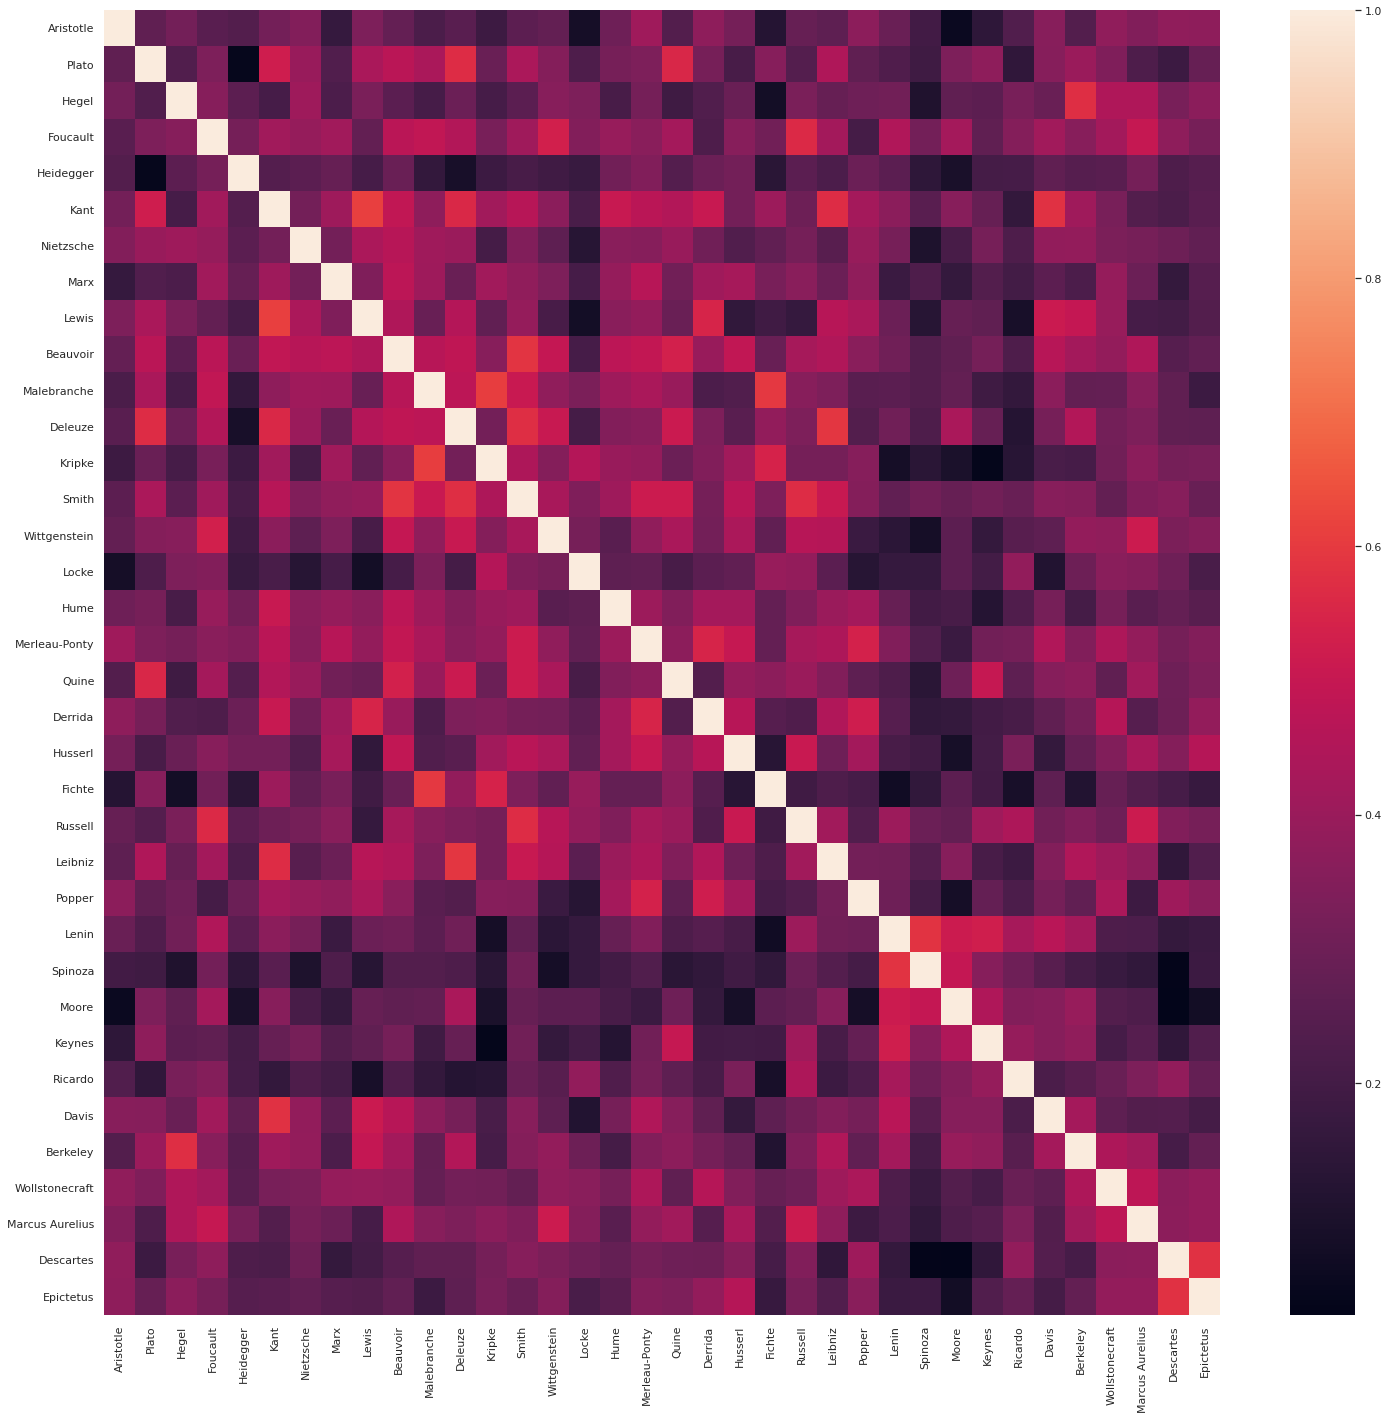

In [72]:
ax = sns.heatmap(pd.DataFrame(similarity_array,index=authors,columns=authors), linewidth=0)
ax.label_outer

sns.set(rc={'figure.figsize':(25,24)})
plt.show()

In [ ]:
# plot heatmap and save images
# https://stackoverflow.com/questions/69448270/change-axis-labels-for-seaborn-heatmap